In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('placement.csv')

In [3]:
df.shape

(1000, 3)

In [4]:
df.sample(5)

,cgpa,placement_exam_marks,placed
565,6.61,54.0,1
144,6.67,17.0,0
635,6.69,10.0,0
408,7.80,24.0,1
718,7.12,36.0,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   cgpa                  1000 non-null   float64
 1   placement_exam_marks  1000 non-null   float64
 2   placed                1000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 23.6 KB


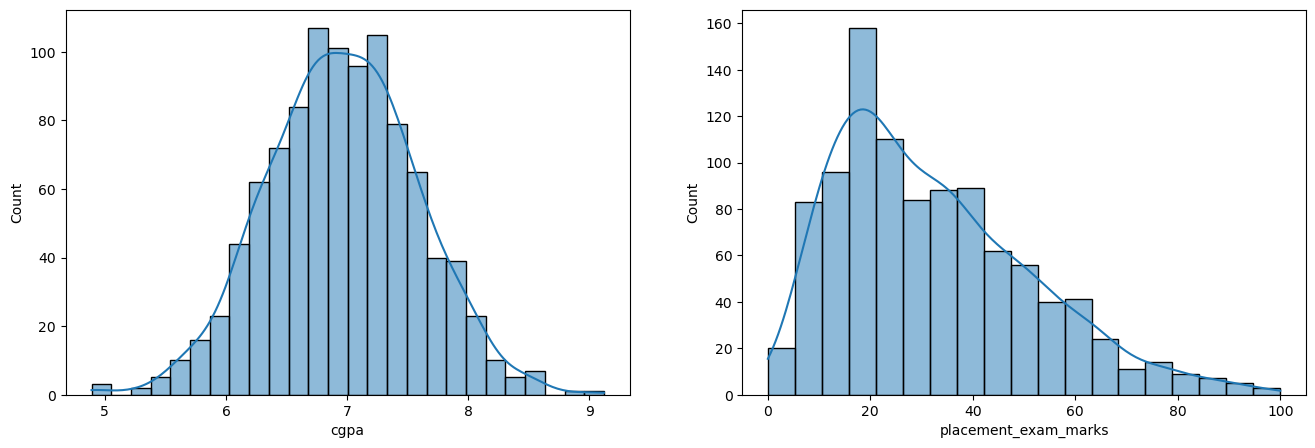

In [8]:
plt.figure(figsize=(16,5))
plt.subplot(121)
sns.histplot(df['cgpa'],kde = True)

plt.subplot(122)
sns.histplot(df['placement_exam_marks'],kde = True)
plt.show()

In [9]:
df['placement_exam_marks'].skew()

0.8356419499466834

In [12]:
print("Mean value of cgpa",df['cgpa'].mean())
print("std value of cgpa",df['cgpa'].std())
print("min value of cgpa",df['cgpa'].min())
print("max value of cgpa",df['cgpa'].max())

Mean value of cgpa 6.96124
std value of cgpa 0.6158978751323894
min value of cgpa 4.89
max value of cgpa 9.12


In [13]:
df['cgpa'].describe()

count    1000.000000
mean        6.961240
std         0.615898
min         4.890000
25%         6.550000
50%         6.960000
75%         7.370000
max         9.120000
Name: cgpa, dtype: float64

In [17]:
# Finding the boundary values
upper_limit = df['cgpa'].mean() + 3*df['cgpa'].std()
lower_limit = df['cgpa'].mean() - 3*df['cgpa'].std()


In [19]:
# Finding the outlier
df[(df['cgpa']>upper_limit)|(df['cgpa']<lower_limit) ]

,cgpa,placement_exam_marks,placed
485,4.92,44.0,1
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
999,4.90,10.0,1


In [24]:
# Trimming 
new_df = df[(df['cgpa'] < upper_limit ) & (df['cgpa'] > lower_limit)]
new_df

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
991,7.04,57.0,0
992,6.26,12.0,0
993,6.73,21.0,1
994,6.48,63.0,0


# Approach2

In [28]:
# calculate the Zscore
df['cgpa_zscore'] = (df['cgpa'] - df['cgpa'].mean())/df['cgpa'].std()

In [29]:
df['cgpa_zscore']

0      0.371425
1      0.809810
2      0.939701
3     -0.878782
4      0.436371
         ...   
995    3.099150
996    3.505062
997   -3.362960
998    2.693239
999   -3.346724
Name: cgpa_zscore, Length: 1000, dtype: float64

In [30]:
df.head()

,cgpa,placement_exam_marks,placed,cgpa_zscore
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371


In [32]:
df['cgpa_zscore'].describe()

count    1.000000e+03
mean    -1.474376e-16
std      1.000000e+00
min     -3.362960e+00
25%     -6.677081e-01
50%     -2.013321e-03
75%      6.636815e-01
max      3.505062e+00
Name: cgpa_zscore, dtype: float64

## Trimming 

In [40]:
# Again trimming
upper_limit1 = df['cgpa_zscore'].max()
lower_limit1 = df['cgpa_zscore'].min()
new_df = df[(df['cgpa_zscore'] < upper_limit1) & (df['cgpa_zscore']>lower_limit1)]

In [42]:
new_df

,cgpa,placement_exam_marks,placed,cgpa_zscore
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371
...,...,...,...,...
993,6.73,21.0,1,-0.375452
994,6.48,63.0,0,-0.781363
995,8.87,44.0,1,3.099150
998,8.62,46.0,1,2.693239


## Capping

In [64]:
upper_limit = df['cgpa'].mean() + 3*df['cgpa'].std()
lower_limit = df['cgpa'].mean() - 3*df['cgpa'].std()

In [65]:
lower_limit2

8.808933625396994

In [66]:
upper_limit2

8.808933625397346

In [67]:
df['cgpa'] = np.where(
    df['cgpa']>upper_limit2,
    upper_limit2,
    np.where(
        df['cgpa']<lower_limit2,
        lower_limit2,
        df['cgpa']
    )
)
print(df['cgpa'].describe())

count    1.000000e+03
mean     8.808934e+00
std      5.864911e-14
min      8.808934e+00
25%      8.808934e+00
50%      8.808934e+00
75%      8.808934e+00
max      8.808934e+00
Name: cgpa, dtype: float64
